In [1]:
import cgpm.utils.general as general
import json
import itertools
import pandas as pd
import yaml
import numpy as np
from cgpm.crosscat.state import State

In [2]:
import matplotlib.pyplot as plt
import scipy

In [3]:
with open('data/cgpm/complete/sample.0.json') as unrefined_metadata_file:
    unrefined_metadata = json.load(unrefined_metadata_file)

with open('data/cgpm/refined/sample.0.json') as refined_metadata_file:
    refined_metadata = json.load(refined_metadata_file)

with open('data/numericalized.csv') as data_file:
    df = pd.read_csv(data_file)

In [4]:
columns_transition = [i for i in range(df.shape[1])]

In [5]:
none_to_nan = lambda x: float('nan') if x is None else x
list_fmap = lambda f: lambda xs: list(map(f, xs))

In [6]:
def refine_crp_hyper_grids(state, n=30):
    final_hyper = state.crp.hypers['alpha']
    new_grid = np.linspace(0.80 * final_hyper, 1.2 * final_hyper, n)
    state.crp.hyper_grids['alpha'] = new_grid

def refine_view_hyper_grids(state, cols, n=30):
    for idx, view in state.views.items():
        final_hyper = view.crp.hypers['alpha']
        new_grid = np.linspace(0.80 * final_hyper, 1.2 * final_hyper, n)
        state.views[idx].crp.hyper_grids['alpha'] = new_grid

def refine_dim_hyper_grids(state, cols, n=30):
    for col in cols:
        final_hypers = state.dim_for(col).hypers
        for name, val in final_hypers.items():
            new_grid = np.linspace(0.80 * val, 1.2 * val, n) 
            state.dim_for(col).hyper_grids[name] = new_grid

In [7]:
def have_same_hyper_grids(x, y):
    assert x.hyper_grids.keys() == y.hyper_grids.keys()
    return all(all(x.hyper_grids[param] == y.hyper_grids[param]) for param in x.hyper_grids.keys())

In [8]:
def have_same_crp_hyper_grids(s1, s2):
    return have_same_hyper_grids(s1.crp, s2.crp)

def have_same_view_hyper_grids(s1, s2):
    assert s1.views.keys() == s2.views.keys()
    return all(have_same_crp_hyper_grids(s1.views[i], s2.views[i]) for i in s1.views.keys())

def have_same_dim_hyper_grids(s1, s2, cols):
    return all(have_same_hyper_grids(s1.dim_for(col), s2.dim_for(col)) for col in cols)

In [9]:
def have_same_overall_hyper_grids(s1, s2, cols):
    return all([have_same_crp_hyper_grids(s1, s2),
                have_same_view_hyper_grids(s1, s2),
                have_same_dim_hyper_grids(s1, s2, cols)])

In [10]:
unrefined_metadata['X'] = list_fmap(list_fmap(none_to_nan))(unrefined_metadata['X'])
refined_metadata['X'] = list_fmap(list_fmap(none_to_nan))(refined_metadata['X'])

In [16]:
unrefined_model = State.from_metadata(unrefined_metadata)
refined_model = State.from_metadata(refined_metadata)

In [12]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

True

In [12]:
unrefined_model.crp.hyper_grids

{'alpha': array([0.125     , 0.14427533, 0.16652297, 0.19220125, 0.2218392 ,
        0.25604739, 0.29553058, 0.34110218, 0.39370104, 0.45441078,
        0.52448213, 0.60535866, 0.69870657, 0.80644898, 0.93080555,
        1.07433824, 1.24000405, 1.43121596, 1.65191326, 1.90664266,
        2.20065202, 2.5399984 , 2.93167289, 3.38374462, 3.90552702,
        4.50776964, 5.20287968, 6.00517753, 6.93119183, 8.        ])}

In [13]:
refine_crp_hyper_grids(unrefined_model)
unrefined_model.crp.hyper_grids

{'alpha': array([0.48428693, 0.49263671, 0.50098648, 0.50933625, 0.51768603,
        0.5260358 , 0.53438558, 0.54273535, 0.55108513, 0.5594349 ,
        0.56778468, 0.57613445, 0.58448423, 0.592834  , 0.60118378,
        0.60953355, 0.61788332, 0.6262331 , 0.63458287, 0.64293265,
        0.65128242, 0.6596322 , 0.66798197, 0.67633175, 0.68468152,
        0.6930313 , 0.70138107, 0.70973085, 0.71808062, 0.7264304 ])}

In [14]:
refined_model.crp.hypers, unrefined_model.crp.hypers

({'alpha': 0.7264303955770383}, {'alpha': 0.6053586629808653})

In [13]:
refined_model.views[2].crp.hypers, unrefined_model.views[2].crp.hypers

({'alpha': 6.512606487791107}, {'alpha': 7.047223438281422})

In [18]:
unrefined_model.dim_for(0).hyper_grids

{'m': array([-19.176752  , -17.73092103, -16.28509007, -14.8392591 ,
        -13.39342814, -11.94759717, -10.50176621,  -9.05593524,
         -7.61010428,  -6.16427331,  -4.71844234,  -3.27261138,
         -1.82678041,  -0.38094945,   1.06488152,   2.51071248,
          3.95654345,   5.40237441,   6.84820538,   8.29403634,
          9.73986731,  11.18569828,  12.63152924,  14.07736021,
         15.52319117,  16.96902214,  18.4148531 ,  19.86068407,
         21.30651503,  22.752346  ]),
 'r': array([3.06654400e-04, 5.35734058e-04, 9.35942808e-04, 1.63511901e-03,
        2.85659993e-03, 4.99056224e-03, 8.71865578e-03, 1.52317424e-02,
        2.66102921e-02, 4.64889457e-02, 8.12175252e-02, 1.41889353e-01,
        2.47884780e-01, 4.33061841e-01, 7.56571491e-01, 1.32175216e+00,
        2.30913903e+00, 4.03413231e+00, 7.04774517e+00, 1.23126135e+01,
        2.15104900e+01, 3.75794447e+01, 6.56523707e+01, 1.14696580e+02,
        2.00378224e+02, 3.50066521e+02, 6.11576281e+02, 1.06844135e+03,


In [14]:
[(refined_model.dim_for(c).hypers, unrefined_model.dim_for(c).hypers) for c in columns_transition]

[({'m': -0.30475955862069104,
   'r': 0.007936983193753711,
   's': 4641.159671057538,
   'nu': 2698.7586206896544},
  {'m': -0.38094944827586374,
   'r': 0.008718655781017333,
   's': 5703.119934774092,
   'nu': 3260.9999999999986}),
 ({'m': -5.872746993103453,
   'r': 0.009380071047163475,
   's': 3813.033939595385,
   'nu': 3148.55172413793},
  {'m': -4.893955827586211,
   'r': 0.008718655781017333,
   's': 4531.884600338777,
   'nu': 3260.9999999999986}),
 ({'m': 1.4015334411414921,
   'r': 0.008899041762693554,
   's': 6111.433900882905,
   'nu': 3913.199999999998},
  {'m': 1.4515882068965453,
   'r': 0.008718655781017333,
   's': 7639.292376103631,
   'nu': 3260.9999999999986}),
 ({'m': 0.8342219738406658,
   'r': 0.00781672587263623,
   's': 4450.417888370231,
   'nu': 3913.199999999998},
  {'m': 0.8173120689655171,
   'r': 0.008718655781017333,
   's': 5563.022360462788,
   'nu': 3260.9999999999986}),
 ({'m': 5.009542223067777,
   'r': 0.008538269799341112,
   's': 7135.7744336

In [13]:
refine_crp_hyper_grids(refined_model)   
refine_view_hyper_grids(refined_model, columns_transition)
refine_dim_hyper_grids(refined_model, columns_transition)

In [14]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

False

In [15]:
refined_model.transition_crp_alpha()

In [16]:
have_same_crp_hyper_grids(refined_model, unrefined_model)

False

In [18]:
refined_model.crp.hyper_grids['alpha'], unrefined_model.crp.hyper_grids['alpha']

(array([0.58114432, 0.59116405, 0.60118378, 0.61120351, 0.62122323,
        0.63124296, 0.64126269, 0.65128242, 0.66130215, 0.67132188,
        0.68134161, 0.69136134, 0.70138107, 0.7114008 , 0.72142053,
        0.73144026, 0.74145999, 0.75147972, 0.76149945, 0.77151918,
        0.78153891, 0.79155864, 0.80157837, 0.8115981 , 0.82161783,
        0.83163756, 0.84165729, 0.85167702, 0.86169675, 0.87171647]),
 array([0.125     , 0.14427533, 0.16652297, 0.19220125, 0.2218392 ,
        0.25604739, 0.29553058, 0.34110218, 0.39370104, 0.45441078,
        0.52448213, 0.60535866, 0.69870657, 0.80644898, 0.93080555,
        1.07433824, 1.24000405, 1.43121596, 1.65191326, 1.90664266,
        2.20065202, 2.5399984 , 2.93167289, 3.38374462, 3.90552702,
        4.50776964, 5.20287968, 6.00517753, 6.93119183, 8.        ]))

In [19]:
refined_model.transition_view_alphas(views=None, cols=columns_transition)

In [20]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

False

In [21]:
refined_model.transition_dim_hypers(cols=columns_transition)

In [22]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

False

In [23]:
refined_model.transition_view_rows(views=None, cols=columns_transition, rows=None)

In [24]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

False

In [25]:
refined_model.transition_dims(cols=columns_transition)

In [26]:
have_same_overall_hyper_grids(unrefined_model, refined_model, columns_transition)

False

In [13]:
# refine_dim_hyper_grids(unrefined_model, columns_transition)

In [14]:
# dim = unrefined_model.dim_for(0)
# hyper = 'r'
# logps = []
# for grid_value in dim.hyper_grids[hyper]:
#     # Compute the probability of the grid point.
#     dim.hypers[hyper] = grid_value
#     logp_k = 0
#     for k in dim.clusters:
#         dim.clusters[k].set_hypers(dim.hypers)
#         logp_k += dim.clusters[k].logpdf_score()
#     logps.append(logp_k)

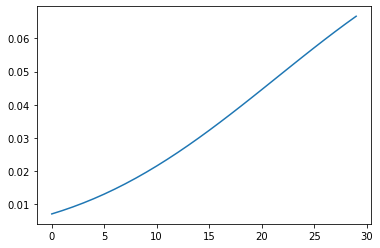

In [15]:
# ps = np.exp(np.array(logps) - scipy.special.logsumexp(logps))
# plt.plot(ps)

In [15]:
columns_transition

[0, 1, 2, 3, 4, 5, 6, 7]

In [12]:
refine_dim_hyper_grids(unrefined_model, columns_transition)

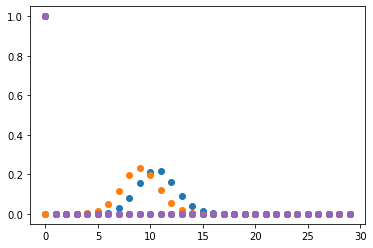

In [15]:
for i in columns_transition[:-3]: 
    dim = unrefined_model.dim_for(i)
    hyper = 's'
    logps = []
    for grid_value in dim.hyper_grids[hyper]:
        # Compute the probability of the grid point.
        dim.hypers[hyper] = grid_value
        logp_k = 0
        for k in dim.clusters:
            dim.clusters[k].set_hypers(dim.hypers)
            logp_k += dim.clusters[k].logpdf_score()
        logps.append(logp_k)
    ps = np.exp(np.array(logps) - scipy.special.logsumexp(logps))
    plt.scatter(range(len(ps)), ps)

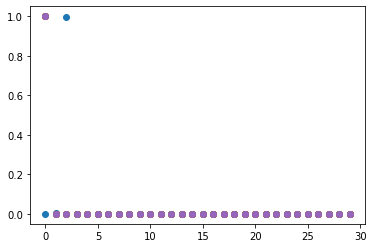

In [19]:
all_ps = []
for i in columns_transition[:-3]: 
    dim = unrefined_model.dim_for(i)
    hypers = 's'
    logps = []
    for grid_value in dim.hyper_grids[hyper]:
        # Compute the probability of the grid point.
        dim.hypers[hyper] = grid_value
        logp_k = 0
        for k in dim.clusters:
            dim.clusters[k].set_hypers(dim.hypers)
            logp_k += dim.clusters[k].logpdf_score()
        logps.append(logp_k)
    ps = np.exp(np.array(logps) - scipy.special.logsumexp(logps))
    all_ps.append(ps)
    plt.scatter(range(len(ps)), ps)

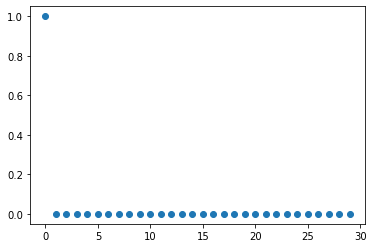

In [23]:
plt.scatter(range(len(ps)), all_ps[2])

In [24]:
all_ps

[array([1.30413394e-022, 5.68704401e-003, 9.94312956e-001, 8.30236957e-014,
        2.51092750e-040, 1.34720121e-078, 4.14344109e-127, 1.59867978e-184,
        1.18123871e-249, 1.83792420e-321, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]),
 array([1.00000000e+000, 4.29377274e-016, 8.35873087e-045, 3.98811117e-085,
        1.59124375e-135, 1.18875976e-194, 2.54047517e-261, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.